   Plats    Huvudman  Totalt (A-F)  Flickor (A-F)  Pojkar (A-F)  Totalt (A-E)  \
0  Riket    Samtliga        106941          51864         55077          97.0   
1  Riket    Kommunal         84310          40675         43635          96.6   
2  Riket     Enskild         22582          11165         11417          98.7   
3  Riket  Skolverket            49             24            25         100.0   

   Flickor (A-E)  Pojkar (A-E)  Totalt (poäng)  Flickor (poäng)  \
0           97.1          97.0            15.7             15.8   
1           96.6          96.6            15.4             15.5   
2           98.8          98.7            16.9             17.0   
3          100.0         100.0            18.5             18.9   

   Pojkar (poäng)  
0            15.7  
1            15.4  
2            16.8  
3            18.2  
Värden för Engelska: [15.7 15.4 16.9 18.5]
Värden för Matematik: [11.9 11.6 13.  14.1]
Värden för Svenska: [13.6 13.3 14.4 15. ]
Värden för Svenska som andras

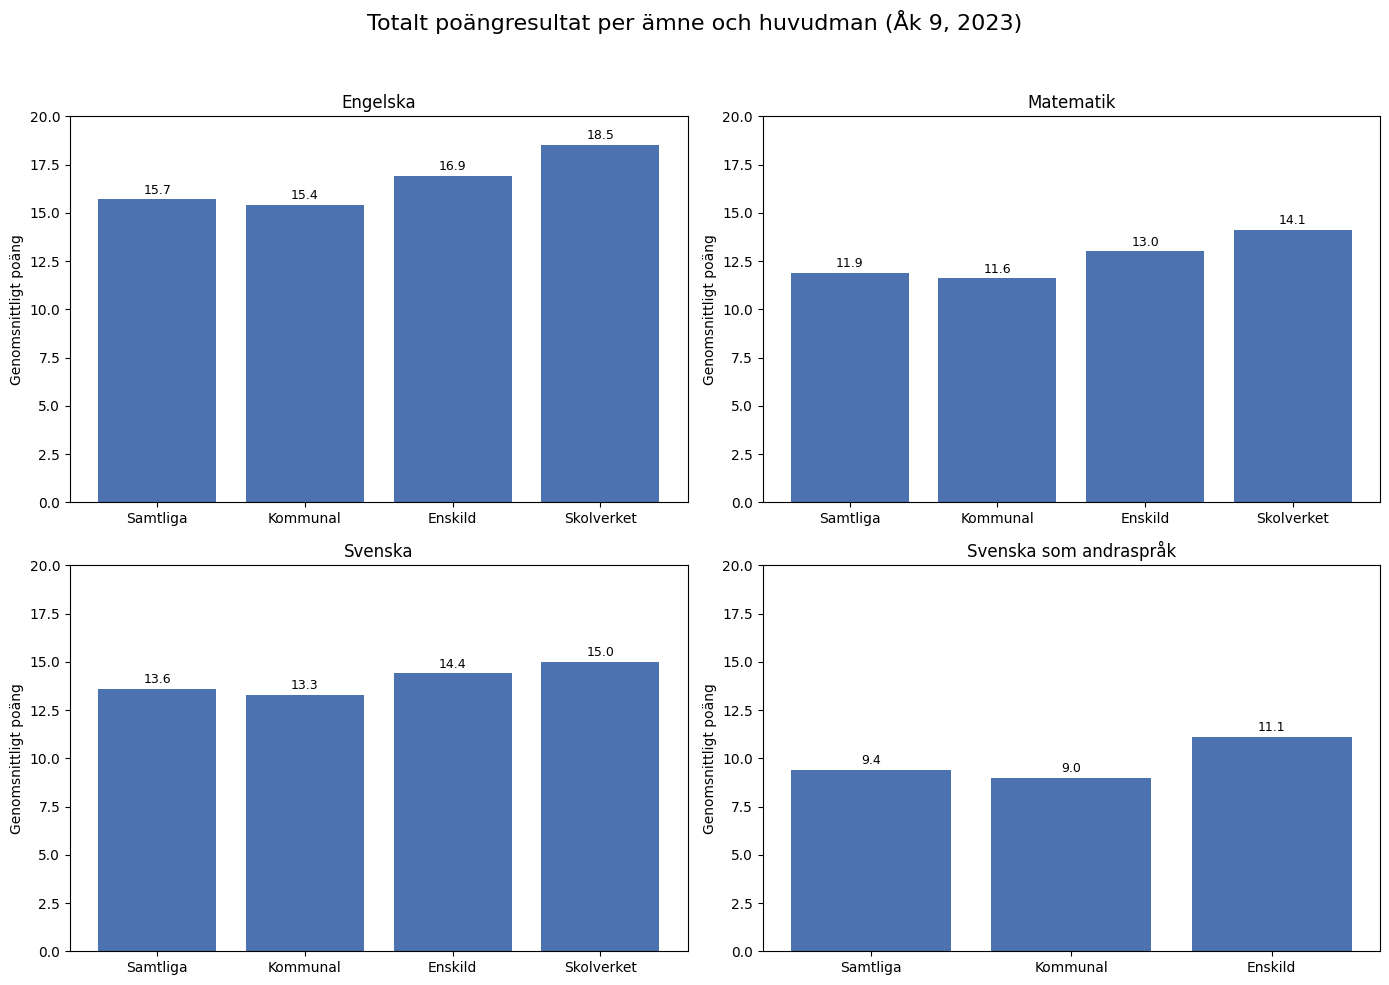

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Skapa mapp för att spara grafer om den inte finns
os.makedirs("visualiseringar", exist_ok=True)

# Filnamnet på Excel-filen
filnamn = "riket2023_åk9_np.xlsx"

# Lista över alla ämnessheets vi ska läsa in
ämnen = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Beskrivande kolumnnamn enligt instruktion
kolumner = [
    "Plats", "Huvudman",
    "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
    "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
    "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"
]

# Lägg alla ämnesdataframes i en ordbok
dataframes = {}

for ämne in ämnen:
    # Läs in ett ark i taget
    df = pd.read_excel(filnamn, sheet_name=ämne, skiprows=8)  # Hoppa över 8 rader för att få rätt format
    df.columns = kolumner  # Byt kolumnnamn
    dataframes[ämne] = df  # Lägg till i ordboken

# Ta bort tomma rader som inte innehåller någon relevant data för Engelska
engelska_df = dataframes["Engelska"]
engelska_df = engelska_df.dropna(how="all")  # Ta bort rader där alla värden är NaN

# Ta bort rader där både 'Plats' och 'Huvudman' är NaN, dessa är mest sannolikt metadata
engelska_df = engelska_df.dropna(subset=['Plats', 'Huvudman'], how="all")

# Återigen säkerställa att det inte finns några tomma kolumner
engelska_df = engelska_df.reset_index(drop=True)  # Nollställ indexet efter radering

# Kontrollera och säkerställ att "Totalt (poäng)" är numerisk
engelska_df["Totalt (poäng)"] = pd.to_numeric(engelska_df["Totalt (poäng)"], errors='coerce')

# Ta bort alla rader där "Totalt (poäng)" är NaN
engelska_df = engelska_df.dropna(subset=["Totalt (poäng)"])

# 🖼️ Visa de första raderna i den rensade Engelska-dataframen för att inspektera data
print(engelska_df.head())

# 🎨 Skapa en figur med 2x2 subplotar (en per ämne)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Totalt poängresultat per ämne och huvudman (Åk 9, 2023)", fontsize=16)

# Gå igenom varje ämne och rita ett stapeldiagram
for i, ämne in enumerate(ämnen):
    ax = axs[i // 2, i % 2]  # Bestäm subplot-position (rad, kolumn)

    # Hämta datan för ämnet
    df = dataframes[ämne]

    # Filtrera så vi bara får rader för "Plats = Riket"
    df_riket = df[df["Plats"] == "Riket"]

    
    
    
    # konvertera "Totalt (poäng)" till numeriska värden
    df_riket["Totalt (poäng)"] = pd.to_numeric(df_riket["Totalt (poäng)"], errors='coerce')  # Omvandla till nummer och sätt NaN om fel

    # Ta bort NaN-värden
    df_riket = df_riket.dropna(subset=["Totalt (poäng)"])

    

    # värden för staplar
    print(f"Värden för {ämne}: {df_riket['Totalt (poäng)'].values}")

    # Skapa stapeldiagram
    bars = ax.bar(df_riket["Huvudman"], df_riket["Totalt (poäng)"], color="#4c72b0")

    # Lägg till rubrik och axel-etiketter
    ax.set_title(ämne)
    ax.set_ylabel("Genomsnittligt poäng")
    
    ax.set_ylim(0, 20)  # säkerställa att alla staplar syns korrekt

    # värden varje stapel
    for bar in bars:
        y = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, y + 0.3, f"{y:.1f}", ha='center', fontsize=9)

#layout och spara som PNG
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Visa diagrammet
plt.show() 

# Spara diagrammet
plt.savefig("visualiseringar/totalt_poäng_per_ämne.png")
plt.close() 
